# Modelo de Budyco-Sellers
## Introducción
El modelo de Budyco-Sellers es un **modelo de balance radiativo** (EBM, por sus siglas en inglés). En esencia, un EBM busca resolver una ecuación del tipo $$mC\frac{dT(\vec x, t)}{dt}=J$$ donde $J$ es la suma de todos los flujos de calor que concurren en cada punto del espacio $\vec x$. En realidad el principal propósito de este tipo de modelos, más que para estudiar la evolución temporal del clima ([problema de condiciones iniciales](https://es.wikipedia.org/wiki/Problema_de_valor_inicial)), es simplemente encontrar la solución de equilibrio estacionario para la cual los flujos de calor se cancelan mutuamente, es decir encontrar $T_e(\vec x,t)$ tal que $$\frac{dT_e(\vec x, t)}{dt}=0.$$ Una vez obtenida esta temperatura, el modelo se puede usar para estudiar cómo el estado de equilibrio depende de las condiciones de contorno climáticas (siendo pues un [problema de condiciones de contorno](https://es.wikipedia.org/wiki/Problema_de_condici%C3%B3n_de_frontera)): parámetros orbitales, actividad solar, composición atmosférica, cubierta de hielo, etc. En función del número de procesos físicos includios en la ecuación de balance, el modelo será más o menos complejo, y por tanto más o menos adecuado para resolver ciertas cuestiones científicas. Parafraseando a Einstein

> "Todo debe hacerse tan simple como sea posible, pero no más."

El modelo de Budyco-Sellers es un caso particular de tipo **unidimensional** (en el espacio), siendo la latitud la única variable espacial (de forma que cada variable a una latitud dada se ha de interpretar como el **promedio zonal**). Los únicos flujos de energía que se consideran en cada punto de este grid unidimensional son:
* radiación incidente de onda corta
* radiación saliente de onda larga
* transporte meridional de calor

## Ecuación fundamental
El modelo de Budyco-Sellers se basa en el equilibrio entre 3 flujos de calor que entra en cada punto del grid.
### Energía que entra de onda corta
La energía que entra en forma de onda corta es la radiación solar, que debido a la forma redonda de la Tierra podemos aproximarla (parametrizarla) como 
$$
S_{SW}(\phi)=\frac{S_0(1-\alpha(\phi))}{4} ( 0.5294 + 0.706 ⋅ \cos^2 \phi).
$$
Donde $S_0$ es la irradiancia solar en el tope de la atmósfera (también llamada constante solar), $\alpha(\phi)$ es el albedo, que depende de la latitud, y el numero 4 es un factor geométrico debido al cociente entre el área de la semiesfera y el círculo.


### Energía que sale de onda larga
La energía que entra al sistema es radaición solar de de onda corta, que es parcialmente abssorbida por el sistema, y luego irradiada de vuelta al especio en forma de radiación de onda larga desde la superficie. Según la **ley de Stefan-Boltzman**, la emitancia de un cuerpo a una temperatura $T$ es
$$
S_{LW}=\sigma \epsilon_sT^4.
$$

Donde $\epsilon_s$ es la emitancia del suelo, que suele ser menor pero muy cercana a 1.

Sin embargo, el proceso físico de la radiación de onda larga saliente es algo (en realidad mucho) más complicado, ya que gran parte de la energía hacia arriba que sale de la superficie hacia arriba es absorbida y luego reemitida en todas direcciones por la atmósfera, dando lugar al efecto invernadero. Este proceso no está simulado dentro del modelo, sino que es parametrizado mediante la introducción de una emisividad menor que 1. 

De esta forma, la energía saliente de onda larga es simulada como

$$
S_{LW} = - \epsilon \sigma  T^4.
$$

Donde el signo menos es porque es energía que tiende a enfriar el sistema, y para el caso terrestre se puede tomar $\epsilon \approx 0.6.$

Esta parametrización es conveniente porque permite simular cualitativamente el efecto de cambios en la composición atmosférica. En efecto, un aumento de la concentración de gases de efecto invernadero se puede simular mediante un cambio en $\epsilon$. No obstante, la relación precisa entre cambios en la concentración de cada gas, y cambios en $\epsilon$ es algo que no puede ser predicho por el modelo, teniendo que ser obtenido para una simulación realista mediante calibración.

### Transporte meridional de calor
Debido a la esfericidad de la Tierra, el ecuador recibe más energía que los polos. Esto establece un gradiente meridional de temperatura que a su vez da lugar a un transporte meriodional de energía hacia los polos que trata de contrarestar este gradiente. El modelo de Budyco-Sellers parametriza el flujo meriodional de energía como
$$
\cos\phi \frac{K(\phi)\rho C}{R}\frac{\partial T}{\partial \phi}
$$

Donde $K$ es la difusividad del calor debida a los fluidos en régimente turbuleto (atmósfera más océano). Esta parametrización reproduce aproximadamente los valores observados de transporte meridional si tomamos 
    $$K(\phi) = K_0( 1.5 + 2.5\cos\phi)
    $$
con $K_0 = 10^6$ m² s ⁻¹.

Así pues, el flujo neto debido al transporte en cada punto es la divergencia (en coordenadas esféricas) de la expresión anterior:
$$
\frac{h}{R\cos\phi}\frac{\partial}{\partial \phi}\left(\cos\phi \frac{K(\phi)\rho C}{R}\frac{\partial T}{\partial \phi}\right)
$$

### Ecuación completa
Teniendo en cuenta estos tres flujos de calor, la ecuación de balance radiativo del modelo de Budyco-Sellers es

\begin{align}
h\rho C\frac{dT(\phi, t)}{dt} &= - \epsilon \sigma  T^4\\
& + \frac{S_0(1-\alpha(\phi))}{4} ( 0.5294 + 0.706 ⋅ \cos^2 \phi)\\
& + \frac{h}{R\cos\phi}\frac{\partial}{\partial \phi}\left(\cos\phi \frac{K(\phi)\rho C}{R}\frac{\partial T}{\partial \phi}\right)
\end{align}

## Discretización

Resolveremos la ecuación del modelo de Budyco-Sellers de manera numérica para encontrar la solución estacionaria. Este modelo tiene un grid unidimensional que es latitudinal, como se representa en la figura, por lo que hemos de discretizar tanto en el espacio como en el tiempo

![grid](./grid.png)


### Discretización en el tiempo

La ecuación completa del modelo se puede escribir en forma compacta como

$$
    \frac{d T(\phi, t)}{dt}=F(\phi, t).
$$

Así pues, mediante el esquema de diferencias centradas, conocida $F(\phi, t)$ podemos estimar $T(\phi, t+\Delta t)$ mediante

$$
    T(\phi, t+\Delta t) = T(\phi, t-\Delta t) + 2 F(\phi, t) \Delta t + \mathcal{O}(\Delta t^2) 
$$

Obviamente hay que tener en cuenta que en el primer paso de tiempo $T(\phi, t-\Delta t)$ no es conocida, por lo que para el primer paso solamente tomaremos el esquema *Euler-Forward*

$$
    T(\phi, t_0+\Delta t) = T(\phi, t_0) + F(\phi, t_0)\Delta t + \mathcal{O}(\Delta t) 
$$

### Discretización en el espacio (latitud)

HASTA AQUÍ ESCRIBO!!!


## Motor del modelo
### Discretización y constantes
Esta celda carga las librerías necesarias para trabajar con Python, define los parámetros de la discretización, y las constantes físicas del problema para simular un equilibrio similar al observado en la Tierra.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

###############################################################################
# Discretisation and initialisation
# time
Nt = 21000                   # maximum number of temporal steps
Dt = 20 * 60                 # time step is set to 20 minutes (in seconds)
tmax = Dt * Nt               # Tmax
t = np.arange(0, tmax, Dt)   # time array

# space
M = 180                      # spatial resolution
phi = np.deg2rad(np.linspace(-89.5, 89.5, M))  # the central angle of each grid
dphi = np.deg2rad(180 / M)   # the angle betwewen grid points
###############################################################################

###############################################################################
# Planet setup for basic case (all fields are latitude dependent, of size M)
eps = 0.6              # emissivity
h = 8300               # ocean height
hoc = 500              # surface ocean height
rho = 1.2              # air density
rhoc = 1028            # ocean density
C = 1000               # heat capacity of the air
Coc = 3900             # heat capacity for the ocean
sig = 5.67e-8          # SB constant     
S0 = 1368              # Solar constant
R = 6371 * 1000        # Earth Radious

# the following parameters are latitude dependent, therefore are defined as arrays of size M
K = (1.5 + 2.5 * np.cos(phi)) * 1e6          # diffusivity
dK = -2.5 * np.sin(phi) * 1e6                # diffusivity gradient
S = S0 * (0.5294 + 0.706 * np.cos(phi)**2)   # input irradiance
###############################################################################

### Funciones auxiliares
Algunas funciones que se definen por conveniencia para hacer el código más sencillo.

* `average` devuelve el promedio global de una variable espacial. Observa que es un **promedio ponderado por la latitud**.
* `gradients` es la función que estima las derivadas $\frac{\partial T}{\partial \phi}$ y $\frac{\partial^2 T}{\partial \phi^2}$ que forman parte del lado derecho de la ecuación del balance
* `get_albedo` es una función que devuelve el albedo $\alpha$. Es una función de la temperatura $T$. Esta función acepta el parámetro `feedback` que simplemente indica el *tipo* de albedo que se ha de considerar.
    1. `feedback=0` significa el albedo constante independiente de $T$
    1. `feedback=1` es un albedo local que no termina de funcionar...
    1. `feedback=2` es un albedo constante que se le ha de dar como entrada en la variable `albedo_constant`
    1. `feedback=3` es un albedo global que me he inventado y funciona batante bien, pero es **demasiado ad-hoc**
* `get_ice` es una función devuelve la cantidad de hielo. Se usa sólo para representar figuras


In [10]:
# function that calculates global average of a given field
def average(var):
    return np.sum(np.cos(phi) * var) / np.sum(np.cos(phi))

# function to obtain the spatial derivatives given a field T(phi)
def gradients (T):
    # initialisation of variables to store the output
    gT = np.zeros(T.shape[0])      # the temperature first derivative (size M)
    ggT = np.zeros(T.shape[0])     # the temperature second derivative (size M)

    # first derivarive    
    gT[0] = (T[1] - T[0])/dphi    # Euler forward for left boundary
    gT[-1] = (T[-1] - T[-2])/dphi # Euler backward for right boundary
    gT[1:-1] = (T[2:] - T[:-2]) / (2 * dphi) # centered differences for inner grids (size M-2)

    # second derivative
    ggT[0] = (gT[1] - gT[0])/dphi    # Euler forward for left boundary
    ggT[-1] = (gT[-1] - gT[-2])/dphi # Euler backward for right boundary
    ggT[1:-1] = (T[2:] -2 * T[1:-1] + T[:-2]) / dphi**2 # centered differences for inner grids (size M-2)
    
    return gT, ggT
  
# function that calculates the albedo at each grid point as a function of T and phi
# this is where different feedbabcks can be programmed!
def get_albedo(T, feedback = 0, albedo_constant = 0):
    if feedback == 0: # simple constant albedo
        albedo = 0.6 - 0.4 * np.cos(phi)
    elif feedback == 1: # local calculation of albedo
        ice = 1 / (1 + np.exp(0.7*(T - 277.15)))
        albedo = ice * 0.75 + (1 - ice) * 0.25
    elif feedback == 2: # returns a given, constant albedo
        albedo = albedo_constant
    elif feedback == 3:  # global calculation of albedo
        Tg = average(T)
        T0 = 292.50565541823704
        if Tg >= T0:
            A = 1 + 20 * np.log(T0/Tg)
            ice = (1 - np.cos(phi)) * A
        else:
            A = 1 - 5 * np.log(T0/Tg)
            ice = 1 - np.cos(phi) * A      
        albedo = 0.4 * ice + 0.2
    else:
        print('Feedback type %d not implemented' % feedback)
        raise Exception('exit')   
    return albedo

def get_ice(T):
    Tg = average(T)
    T0 = 292.50565541823704
    if Tg >= T0:
        A = 1 + 20 * np.log(T0/Tg)
        ice = (1 - np.cos(phi)) * A
    else:
        A = 1 - 5 * np.log(T0/Tg)
        ice = 1 - np.cos(phi) * A  
    return ice

### Resolución numérica de la ecuación de balance
Estas fos funciones hacen lo mismo. Ambas resuelven la dinámica de la temperatura de forma numérica. La diferencia es que `solve` rellena una matriz, guardando todos los pasos intermedios, mientras que `balance_planet` es *más inteligente*, y de hecho es la que se usa principalmente más abajo.

`balance_planet` toma 2 parámetros:
* el array `T`, que es tamaño `M` y contiene el perfil de temperaturas inicial
* la variable `feedback`, que se usa para calcular el tipo de albedo que se ha de considerar, determinando así el tipo de modelo. `albedo_constant` tiene el mismo significado que en la función `get_albedo`, y de hecho ambas variables se le pasan a esta función simplemente para que desde dentro se llame a `get_albedo`

`balance_planet` devuelve un array de tamaño `M` que no es sino la temperatura de equilibrio. Esta función es *inteligente* en el sentido en que no hace un número determinado de iteraciones (como hace `solve`), sino que hace hasta que detecta que se ha alcanzado el equilibrio, definido en función de una tolerancia. Si tras un número muy elevado de iteraciones no se alcanza el estacionario, la función eleva una excepción para evitar que el programa siga corriendo.

In [3]:
# function that fills in T[M, Nt] according to the physical parameters and
# initial condition given in T[:,0]. 
# We use simple Euler forward in time.
def solve(T, feedback = 0, albedo_constant = 0):
    for i in range(1, Nt):
        gT, ggT = gradients(T[:,i-1]) # obtain gradients of T for this iteration
        albedo = get_albedo(T[:,i-1], feedback, albedo_constant) # obtain the albedo for this iteration
        
        # apply Euler forward in time to obtain T(t+Dt)
        T[:,i] = T[:,i-1] \
        + Dt * (1 - albedo[:]) * S[:] / (4 * C * rho * h) \
        - Dt * eps * sig * T[:,i-1]**4 / (C * rho * h) \
        + Dt / R**2 / np.cos(phi) * K  * np.cos(phi) * ggT \
        + Dt / R**2 / np.cos(phi) * dK * np.cos(phi) * gT \
        - Dt / R**2 / np.cos(phi) * K  * np.sin(phi) * gT

# function that solves the ec. iteratively to obtain T(t). It returns just the final (equilibrium) step
# We use simple Euler forward in time.
def balance_planet(T, feedback=0, albedo_constant=0):
    # first step: Euler forward
    gT, ggT = gradients(T) # obtain gradients of T for this iteration
    albedo = get_albedo(T, feedback, albedo_constant) # obtain the albedo for this iteration

    F = (1 - albedo) * S / (4 * C * rho * h) \
    - eps * sig * T**4 / (C * rho * h) \
    + 1 / R**2 / np.cos(phi) * K  * np.cos(phi) * ggT \
    + 1 / R**2 / np.cos(phi) * dK * np.cos(phi) * gT \
    - 1 / R**2 / np.cos(phi) * K  * np.sin(phi) * gT    

    Tnew = T + F * Dt
    Told = T
    T = Tnew
    
    # following steps: centered in time  (Ti-1 = Told, Ti = T, Ti+1 = Tnew)
    tol = 1e-5
    cont = 0
    while True:
        cont += 1
        gT, ggT = gradients(T) # obtain gradients of T for this iteration
        albedo = get_albedo(T, feedback, albedo_constant) # obtain the albedo for this iteration

        F = (1 - albedo) * S / (4 * C * rho * h) \
        - eps * sig * T**4 / (C * rho * h) \
        + 1 / R**2 / np.cos(phi) * K  * np.cos(phi) * ggT \
        + 1 / R**2 / np.cos(phi) * dK * np.cos(phi) * gT \
        - 1 / R**2 / np.cos(phi) * K  * np.sin(phi) * gT
        
        # apply centered differences (NO FUNCIONA!!!)
#         Tnew[:] = Told[:] + 1 * F[:] * Dt
#         Told[:] = T[:]
#         T[:] = Tnew[:]
        
        # apply Euler forward in time to obtain T(t+Dt)
        Tnew[:] = T[:] + F[:] * Dt
        Told[:] = T[:]
        T[:] = Tnew[:]
        
        
        if np.abs(np.max(2 * F * Dt)) < tol:
            print('Converged after %d iterations' % cont)
            return Tnew
        if cont > 40000:
            print('Equilibrium not reached after %d iterations' % 40000)
            print(Tnew)
            raise Exception('exit')
            return np.nan

## Experimento 1: evolución hacia el equilibrio
Este caso es el más sencillo. Fijamos todos lso parámetros y partiendo de una Tierra homogénea a 0 ºC, $T(\phi, t)=273.15$, alcanzamos una situación estacionaria. Es esencialmente un test de los algoritmos.

In [4]:
# run the simulation filling in the T matrix
T = np.zeros((M, Nt))            # temperature, (shape M x Nt)
T[:] = 273.15                    # we start the planet at homogeneous 0ºC
solve(T)

# Repeat, but thsi time using the 'smart' approach
T_ = T[:,0]
T_ = balance_planet(T_)

Converged after 18604 iterations


Ya que tenemos el resultado de la evolución temporal en la matriz `T`, lo podemos representar como un colormap o como varios perfiles usando una paleta de color variable en el tiempo.

Pintamos encima el perfil obtenido con el método *rápido* para comprobar que sale lo mismo.

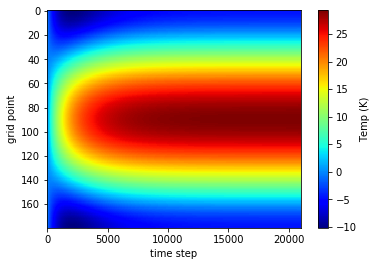

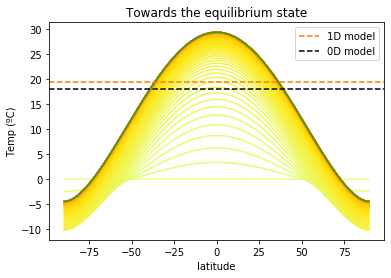

In [5]:
# plot results as a colormap
fig, ax = plt.subplots()
im = ax.imshow(T - 273.15, cmap=cm.jet, aspect=100)
ax.set(xlabel='time step', ylabel='grid point')
cbar = fig.colorbar(im)
cbar.set_label('Temp (K)')
fig.savefig("T_evol1.pdf")

# plot results as a series of coloured lines
fig, ax = plt.subplots()
color_palette = cm.Wistia(np.linspace(0, 1, len(range(1, Nt, 200))))
for this_color, step in zip(color_palette, range(1, Nt, 200)):
    ax.plot(np.rad2deg(phi), T[:,step]-273.15, c = this_color)

ax.plot(np.rad2deg(phi), T_ - 273.15, c = 'tab:green')

plt.axhline(y = average(T[:,-1]) - 273.15, c = color_palette[-1], linestyle = 'dashed', label = '1D model')
S_mean = average(S)
albedo_mean = average(get_albedo(T[:,-1]))
T0D = np.power(S_mean*(1-albedo_mean)/4/eps/sig, 0.25)
plt.axhline(y = T0D - 273.15, c = 'black', linestyle = 'dashed', label = '0D model')

ax.set(xlabel='latitude', ylabel='Temp (ºC)')
ax.set_title('Towards the equilibrium state')
plt.legend()
fig.savefig("T_evol2.pdf")

## Experimento 2: entender el papel de la difusividad
En este caso vamos a realizar una serie de experimentos. ¿Cómo sería el gradiente meridional de temperatura en la Tierra si el transporte de calor hacia los polos fuera más o menos eficiente al observado? Esto se puede ver simplemente repitiendo varias simulaciones variando el valor de $K_0$. Lo haremos variar entre 0 y 1.3 a lo largo de 14 experimentos.

In [6]:
# set again the default setup (safety measure in case this block is run manually)
S = S0 * (0.5294 + 0.706 * np.cos(phi)**2)   # input irradiance
eps = 0.6
T = np.zeros((M))                # temperature, (shape M)
T[:] = 273.15                    # we start the planet at homogeneous 0ºC

Nexp = 14
k_factors = np.linspace(0, 1.3, Nexp)  # we go from 0 to 1.3 times the book case
T_K = np.zeros((M, Nexp)) # define an array to store the equilibrium states after each experiment

# loop in experiments. The result gets stored in the array T_K
for i, K0 in enumerate(k_factors):  #Note: i is the experiment number, K0 is the diffusivity amplitude 
    print('Exp. %s out of %s' % (i+1, Nexp))
    
    # modify the diffusivity to setup this 'world'
    K = (1.5 + 2.5 * np.cos(phi)) * 1e6 * K0
    dK = -2.5 * np.sin(phi) * 1e6 * K0
    
    # run this 'world' (after first step we start from a 'better' initial condition using the _fast approach)
    T_K[:,i] = balance_planet(T)
    T[:] = T_K[:,i]   # save the obtained profile as initial condition for next planet

Exp. 1 out of 14
Converged after 18241 iterations
Exp. 2 out of 14
Converged after 22177 iterations
Exp. 3 out of 14
Converged after 17331 iterations
Exp. 4 out of 14
Converged after 14511 iterations
Exp. 5 out of 14
Converged after 12576 iterations
Exp. 6 out of 14
Converged after 11123 iterations
Exp. 7 out of 14
Converged after 9973 iterations
Exp. 8 out of 14
Converged after 9032 iterations
Exp. 9 out of 14
Converged after 8242 iterations
Exp. 10 out of 14
Converged after 7568 iterations
Exp. 11 out of 14
Converged after 6986 iterations
Exp. 12 out of 14
Converged after 6477 iterations
Exp. 13 out of 14
Converged after 6030 iterations
Exp. 14 out of 14
Converged after 5633 iterations


Pintamos los resultados como antes, usando una paleta variable que da sensación de movimiento.

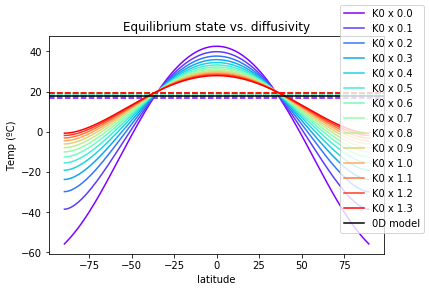

In [7]:
# plot results
color_palette = cm.rainbow(np.linspace(0, 1, Nexp)) # palette
fig, ax = plt.subplots()

for this_color, i in zip(color_palette, range(Nexp)): # loop plotting 1 line per experiment with the given colour
    ax.plot(np.rad2deg(phi), T_K[:,i] - 273.15, label='K0 x %.1f' % (k_factors[i]), color = this_color) # plot profile
    plt.axhline(y = average(T_K[:,i]) - 273.15, color = this_color, linestyle = 'dashed')      # plot global average

# plot the result for the 0D model for comparison (only global average!)
S_mean = average(S)
albedo_mean = average(get_albedo(T_K[:,-1]))
T0D = np.power(S_mean*(1-albedo_mean)/4/eps/sig, 0.25)
plt.axhline(y=T0D - 273.15, color = 'black', label = '0D model')

# setup labels, axis, etc.
ax.set(xlabel='latitude', ylabel='Temp (ºC)')
ax.set_title('Equilibrium state vs. diffusivity')
fig.legend()
fig.savefig("Diffusivity.pdf")

## Experimento 3: Sensibilidad climática
En este experimentos variamos $\epsilon$ entre 0.57 y 0.63, simulando así cambios en la concentración de gases de efecto invernadero. Nota que un aumento en la emisividad implica un efecto invernadero menor, lo que produce un forzamiento radiativo negativo y por tanto una disminución en $T_{eq}$.

In [23]:
# set again the default setup (safety measure in case this block is run manually )
K = (1.5 + 2.5 * np.cos(phi)) * 1e6          # diffusivity
dK = -2.5 * np.sin(phi) * 1e6                # diffusivity gradient
S = S0 * (0.5294    + 0.706 * np.cos(phi)**2)   # input irradiance

# setup list of perturbed climates
Nexp = 7
eps_min = 0.57
eps_max = 0.63
eps_list = np.linspace(eps_min, eps_max, Nexp)

# auxiliary function to compute RF from basic case (where Teq and eps are fixed)
def RF(eps):
    return -sig * np.power(292.50565541823704, 4) * (eps - 0.6) 

RF_list = RF(eps_list)

T_nf = np.zeros((M, Nexp))     # to store the temperature profiles without feedback
T_f = np.zeros((M, Nexp))      # to store the temperature profiles with feedback
Tg_nf = np.zeros(Nexp)         # to store the global average without feedback
Tg_f = np.zeros(Nexp)          # to store the global average with feedback
ice_f = np.zeros(Nexp)         # to store the amount of ice

# solve the basic case to obtain something to compare with
eps = 0.6
T_base = balance_planet(np.ones(M)*273)
albedo_base = get_albedo(T_base)
ice_base = get_ice(T_base)

T_nf[:,0] = T_base    # use the basic case as 'good' initial condition
T_f[:,0] = T_base

#loop in the experiments with different epsilons. The results are stored in the arrays defined above
for i in range(Nexp):
    eps = eps_list[i]
    print('Exp. %d out of %d. eps = %.2f' % (i+1, Nexp, eps))
 
    # the idea is to recycle the Teq of former experiment as initial condition for the next one.
    # this reduces computational time
    if i == 0:
        T_nf[:,i] = balance_planet(T_nf[:,i].copy(), feedback=0)
        T_f[:,i] = balance_planet(T_f[:,i].copy(), feedback=3)
    else:
        T_nf[:,i] = balance_planet(T_nf[:,i-1].copy(), feedback=0)
        T_f[:,i] = balance_planet(T_f[:,i-1].copy(), feedback=3)
    Tg_f[i] = average(T_f[:,i])
    Tg_nf[i] = average(T_nf[:,i])
    ice_f[i] = average(get_ice(T_f[:,i]))

Converged after 18625 iterations
Exp. 1 out of 7. eps = 0.57
Converged after 14631 iterations
Converged after 28056 iterations
Exp. 2 out of 7. eps = 0.58
Converged after 11234 iterations
Converged after 19507 iterations
Exp. 3 out of 7. eps = 0.59
Converged after 11188 iterations
Converged after 19848 iterations
Exp. 4 out of 7. eps = 0.60
Converged after 11100 iterations
Converged after 20129 iterations
Exp. 5 out of 7. eps = 0.61
Converged after 11013 iterations
Converged after 24978 iterations
Exp. 6 out of 7. eps = 0.62
Converged after 10929 iterations
Converged after 25829 iterations
Exp. 7 out of 7. eps = 0.63
Converged after 10846 iterations
Converged after 26799 iterations


Ya tenemos rsuelto el problema. Ahora podemos representar los resultados. Hacemos dos figuras más bien complejas.
* En una de ellas mostramos los perfiles de temperatura, el albedo y la cantidad de hielo
* En otra pintamos sólo los valores medios globales, comparando los resultados con y sin feedback. Esta figura sirve tanto para determinar la sensibilidad climática (y cómo de sensible es a la simulación de feedbacks) como para estimar la ganancia del feedback

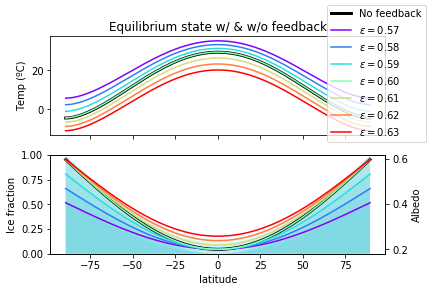

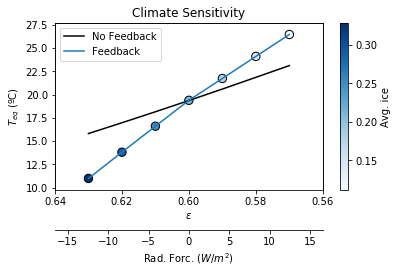

In [24]:
# plot profiles for each experiment

# solution and plotting the result. Complex figure ahead! Please note:
# ax1 axes contain the temperature profiles
# ax2 axes contain the ice fraction profiles
# ax3 axes contain albedo profiles
# ax2 & ax3 axes are overlaid and share the x axis

color_palette = cm.rainbow(np.linspace(0, 1, Nexp))

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax3 = ax2.twinx()

ax1.set(ylabel='Temp (ºC)')
ax1.set_title('Equilibrium state w/ & w/o feedback')
ax2.set(xlabel = 'latitude', ylabel='Ice fraction')
ax2.set_ylim(0, 1)
ax3.set(xlabel='latitude', ylabel='Albedo')

ax1.plot(np.rad2deg(phi), T_base - 273.15, label='No feedback', c='black', linewidth=3) # draw basic T profile
ax3.plot(np.rad2deg(phi), albedo_base, c='black', linewidth=3) # draw basic albedo

for this_color, i in zip(color_palette, range(Nexp)):   
    ax1.plot(np.rad2deg(phi), T_f[:,i] - 273.15, label=r'$\epsilon = %.2f$' % eps_list[i], c = this_color)
    ax2.fill_between(np.rad2deg(phi), get_ice(T_f[:,i]), facecolor='tab:cyan', alpha=0.1)
    ax3.plot(np.rad2deg(phi), get_albedo(T_f[:,i], feedback=3), c=this_color)

fig.legend()
fig.savefig("Feedback1.pdf")


# plot climate sensityfivy figure
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

# Make some room at the bottom
fig.subplots_adjust(bottom=0.30)

ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 40))

ax1.set_xlim(eps_max+0.01, eps_min-0.01)
ax2.set_xlim(RF(eps_max+0.01), RF(eps_min-0.01))

ax2.plot(RF_list, Tg_nf - 273.15 , color = 'black', label='No Feedback')
ax2.plot(RF_list, Tg_f - 273.15, label='Feedback')

im = ax1.scatter(eps_list, Tg_f - 273.15, c = ice_f, cmap=plt.cm.Blues, s=70, linewidths=1, edgecolors='black')
cbar = fig.colorbar(im, ax=ax1)
cbar.set_label('Avg. ice')

ax1.set(xlabel='$\epsilon$', ylabel=r'$T_{eq}$ (ºC)')
ax2.set(xlabel='Rad. Forc. ($W/m^2$)')
ax1.set_title('Climate Sensitivity')

plt.legend(loc='upper left')
fig.savefig("Feedback2.pdf")
